<h1> <center> GEOG 172: INTERMEDIATE GEOGRAPHICAL ANALYSIS </h1>
    <h2> <center> Evgeny Noi </h2>
        <h3> <center> Lecture 03: Geographic Data </h3>

# Types of Geographic Data 

* Digital representation 
    * Vector (points, lines, polygons) 
    * Raster (grid like representation)
    
* Object View 
    * any entitiy in space can be an object (house, river)
    * objects have behavior, change over time 

* Field View 
    * world consists of properties that vary over space (elevation, soil type)
    * continuous (every point on a map has a value) 
    * raster

# Choosing Data Representation 

* Field versus Object representation depends on **APPLICATION** 

# Geographic Data Applications 

* Traditional GIS are rather rigid in how they represent data (tailored to spatial-only data) 
* GeoPandas represents geometry through tabular data format 
* Object-oriented data view is used often in movement analysis 
* Field view is used in climate sciences and remote sensing

# Geographic Data 

* Observations are spatially referenced 
* Challenging to formalize 
* Difficult to manage in a digital environment 
* Visualizations are tricky (as we will find out)
* Observations are related to nearby observations (TFL) 
* Challenging to generalize common operations

# Abstraction

* Representing real world objects in a digital environment (Reality --> Representation) 

# Different Flavors of Spatial Data

* Primary data (directly from source: GPS)
* Secondary data (collected and processed by third party) 
* Explicitely spatial (patterns/locations are primary interest) 
* Implicitely spatial (locations are available, but not analyzed) 
* Individual (moving animal) 
* Aggregate (aggregate mobility indices: average distance driven per day per county) 

# Measurement Concepts 

* Imperfection / Vagueness / Ambiguity 
* Precision 
* Accuracy 
* Validity 
* Reliability 
* Scale 
* Representation

# Imperfection / Vagueness / Ambiguity 

* Boundaries are indeterminate or fuzzy (think soils) 
* Objects can change / tranform / disapear 
* Objects do not have simple geometry and are multidimensional 
* Measurements are always subject to error (e.g. sampling error, selection bias) 

# Accuracy and Precision 

* Accuracy - system-wide bias, closeness to true values 
* Precision - exactness associated with a measurement, decimals at the end of a measurement

# Accuracy and Precision

<img src="https://wp.stolaf.edu/it/files/2017/06/precsionvsaccuracy_crashcourse-579x600.png"> 

# Validity 

* Operationalizing concepts and terms (demographic, socioeconomic and environment phenomena) 
* How valid (close to reality) are the variables that approximate real-life concepts

# Reliability 

* Degree of consistency and stability of information (postal addresses change) 
* Data collection uniformity (across countries) 

# Representation 

* Representing Earth (geodesy) 
    * Sphere 
    * Ellisoid 
    * Geoid
* Map projections

<img src="https://cdn.britannica.com/67/467-050-A9D84A6E/Deflection-vertical-geoid-spheroid.jpg">

<img src="https://uploads-ssl.webflow.com/5f6a4786fa53db61032919f9/5fa448cef7b8e0331a6544a2_greenland.png"> 

# Scale 

* Level of detail 
* [OpenStreetMap Zoom Level](https://wiki.openstreetmap.org/wiki/Zoom_levels)
    * 0 - whole world, 7 - small contry / US state, 15 - small road
* Resolution (meters per pixel) 
* Map Scale (1cm = 1km) 

# Simplification / Generalization 

<img src="https://open.lib.umn.edu/app/uploads/sites/178/2017/07/Image089.jpg">

# Digital Representation of Spatial Data

<img src="https://pythongis.org/_images/vector_vs_raster.jpg" width="800px" >

# Geometry Types 

* (multi)Point
* (poly/multi)Line
* (multi)Polygon
* Geometry Collection (?) 

<img src="https://automating-gis-processes.github.io/site/_images/SpatialDataModel.PNG">

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon
from descartes.patch import PolygonPatch
import matplotlib.pyplot as plt

# create points 
lu = Point(34.417336, -119.869598)
ru = Point(34.417336, -119.853698)
lb = Point(34.409077, -119.869598)
rb = Point(34.409077, -119.853698)

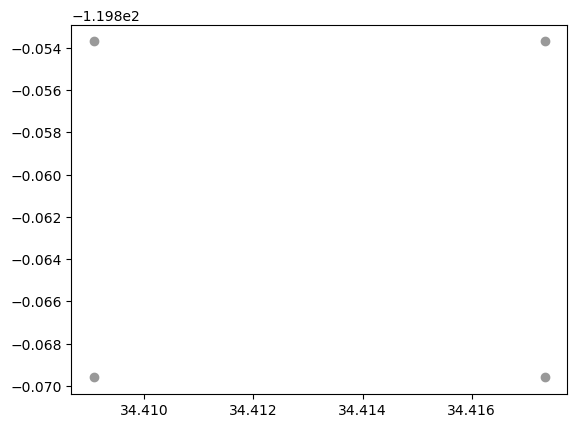

In [2]:
def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)
    
fig, ax = plt.subplots()

plot_coords(ax, lu)
plot_coords(ax, ru)
plot_coords(ax, lb)
plot_coords(ax, rb)

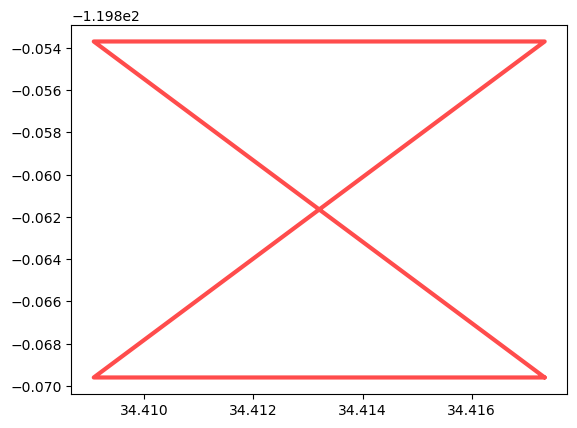

In [3]:
def plot_line(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, color='red', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    
# create a line from points 
fig, ax = plt.subplots()
line = LineString([lu,rb,ru,lb, lu])

plot_line(ax, line)

In [4]:
# length of a line in degrees 
print(line.length)
print(line.geom_type)

0.052352122341691086
LineString


area: 0.00013131809999994282
bbox: (34.409077, -119.869598, 34.417336, -119.853698)


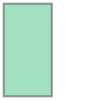

In [5]:
poly = Polygon([lu,ru,rb,lb,lu])

print('area:', poly.area)
print('bbox:', poly.bounds)
poly

# Vector Data Formats 

* **Shapefile** - developed and introduced by ESRI in the early 1990s (extension: .shp). Shapefile is not a single file, but it is made of multiple separate files. The three mandatory files that are associated to a valid shapefile dataset are: .shp containing the feature geometries, .shx containing a positional index for the feature geometries, and .dbf containing the attribute information. In addition to these, a shapefile dataset typically includes a .prj file which contains information about the coordinate reference system of the dataset.
* **GeoJSON** - open standard format for encoding a variety of geographic data structures for the web (extension: .geojson). The data format extends the widely used JSON format. GeoJSON is human readible and the data is not compressed, hence the files can get large when storing more complex geometries. Because of this, another variation of GeoJSON was developed called TopoJSON which is a more compact format. TopoJSON stores the geometries in a way that they can be referenced multiple times in the file, e.g. when two polygons share a common border between them. 
* **GeoPackage** - open, portable and platform-independent data format based on SQLite database

# GeoPandas 

<img src="https://geopandas.org/en/stable/_images/dataframe.svg">

In [6]:
import geopandas as gpd 
import numpy as np

# reading data 
gdf = gpd.read_file('https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/california-counties.geojson')
print(gdf.shape)
gdf.head()

(58, 5)


,name,cartodb_id,created_at,updated_at,geometry
0,Alameda,1,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"MULTIPOLYGON (((-122.31293 37.89733, -122.2884..."
1,Alpine,2,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.07239 38.70277, -119.96495 38.7..."
2,Amador,3,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.02726 38.48925, -121.02741 38.5..."
3,Butte,4,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-121.87925 39.30361, -121.90831 39.3..."
4,Calaveras,5,2015-07-04 21:04:58+00:00,2015-07-04 21:04:58+00:00,"POLYGON ((-120.87605 38.02889, -120.91875 38.0..."


In [7]:
# keep only two columns
gdf = gdf[['name', 'geometry']]
print(gdf.shape)

(58, 2)


<AxesSubplot: ylabel='Frequency'>

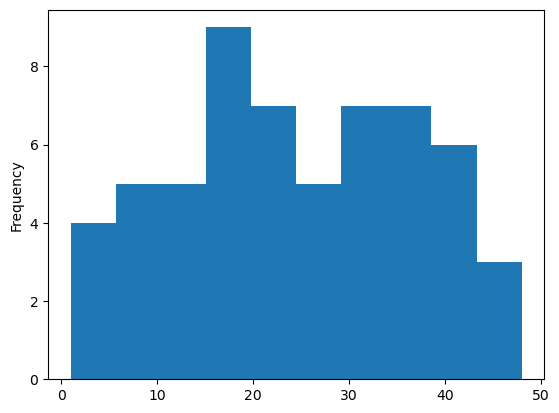

In [8]:
# let's randomly generate a variable to practice plotting 
gdf['butter_per_capita'] = np.random.randint(1, 50, gdf.shape[0])

# histogram 
gdf.butter_per_capita.plot(kind='hist')

In [9]:
# check projection 
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Basic Plotting with GeoPandas

<AxesSubplot: >

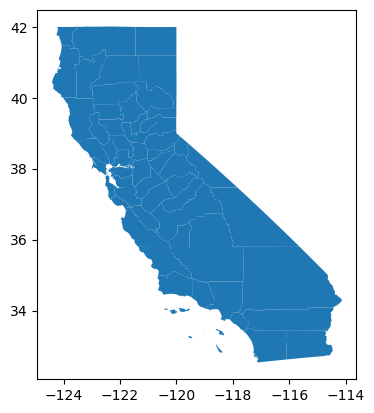

In [10]:
gdf.plot()

<AxesSubplot: >

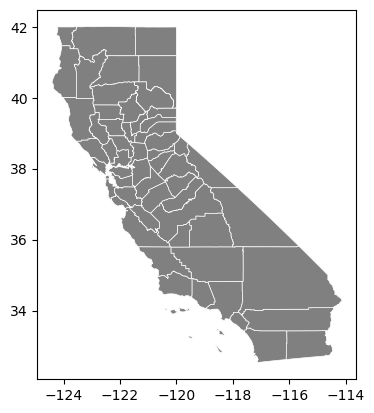

In [11]:
# some modifications 
gdf.plot(fc='gray', ec='white', linewidth=.5)

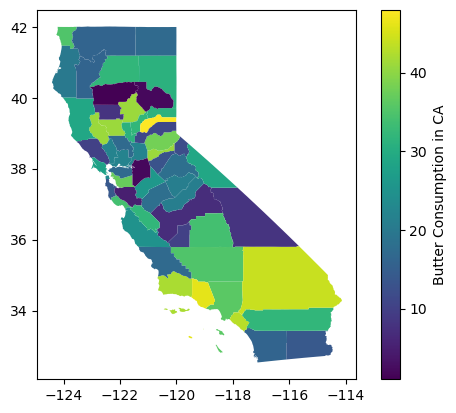

In [12]:
# choropleth mapping 
gdf.plot(column='butter_per_capita', legend=True, 
        legend_kwds={'label': 'Butter Consumption in CA'});

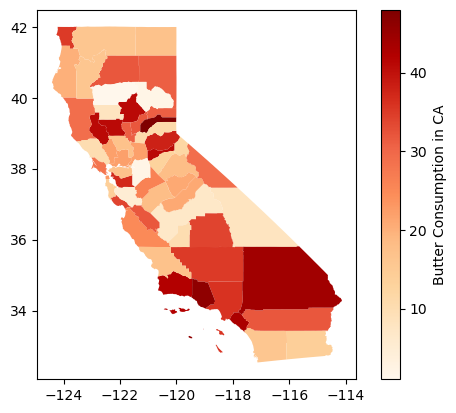

In [13]:
# choropleth mapping 
gdf.plot(column='butter_per_capita', legend=True,
         cmap='OrRd',
        legend_kwds={'label': 'Butter Consumption in CA'});

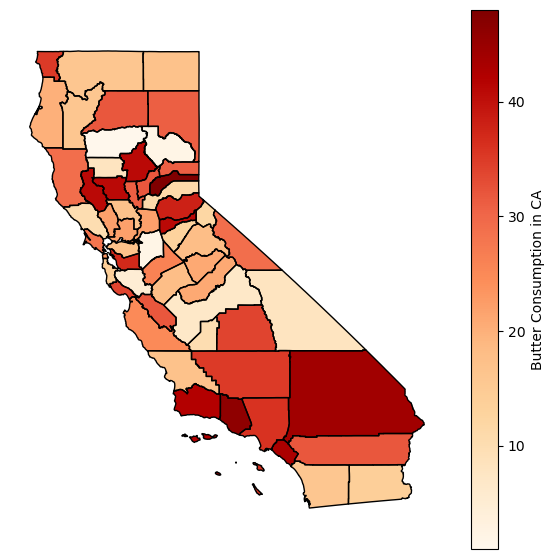

In [14]:
# layer for better visuals

fig, ax = plt.subplots(figsize=(7,7))

gdf.plot(column='butter_per_capita', legend=True,
         cmap='OrRd',
        legend_kwds={'label': 'Butter Consumption in CA'},ax=ax)
gdf.plot(ax=ax, fc='None', ec='k') # adds county boundaries

_ = ax.axis("off") # remove axes

fig.savefig('butter.png', dpi=150) # save file

C:\Users\barguzin\AppData\Local\Temp\ipykernel_34368\2936357403.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, marker='*', color='red');


Text(0.5, 1.0, 'California Counties and Centroids')

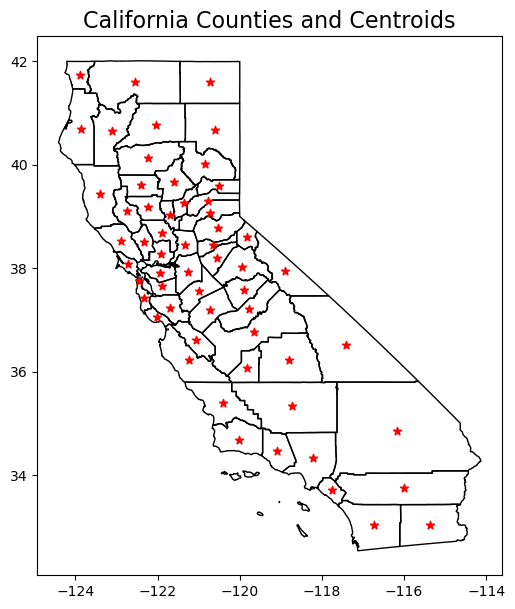

In [15]:
# plot centroids of counties 
fig, ax = plt.subplots(figsize=(7,7))

gdf.plot(ax=ax, fc='None', ec='k'); # adds county boundaries
gdf.centroid.plot(ax=ax, marker='*', color='red');

ax.set_title('California Counties and Centroids', fontsize=16)

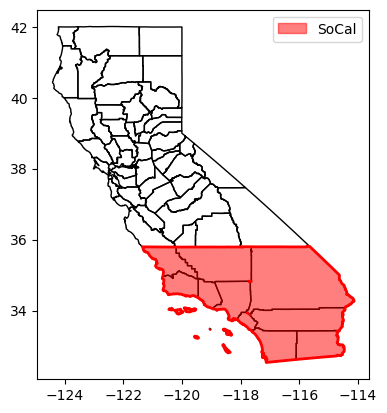

In [16]:
import matplotlib.patches as mpatches

# plot specific areas 
socal_counties = ['Imperial', 'Kern', 'Los Angeles', 'Orange', 'Riverside', 'San Bernardino', 'San Diego', 'San Luis Obispo', 'Santa Barbara', 'Ventura']

socal = gdf.loc[gdf.name.isin(socal_counties),]

fig, ax = plt.subplots()

gdf.plot(ax=ax, fc='None', ec='k'); # adds county boundaries
socal.plot(ax=ax, fc='red', ec='r', lw=0, alpha=.5); # plot socal
socal.dissolve().plot(ax=ax, fc='None', ec='r', lw=2) # demo dissolve

# add legend 
red_patch = mpatches.Patch(color='red', label='SoCal', alpha=.5)
ax.legend(handles=[red_patch])